In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
#load datasets
data_playlist = pd.read_csv('yaren_data_analysis/playlist_tracks.csv')
recommended_playlist = pd.read_csv('yaren_data_analysis/recommended_tracks.csv')

In [11]:
#displays the first 5 songs on your own playlist
data_playlist.head()

,Name,Artist(s),Album,Acousticness,Danceability,Duration_ms,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valance
0,Tangled In The Great Escape,"Pierce The Veil, Jason Butler",Collide With The Sky,0.007110,0.278,356893,0.933,0.000017,0.384,-3.850,0.1150,105.001,0.116
1,Somebody Told Me,The Killers,Hot Fuss,0.000090,0.497,197200,0.970,0.000674,0.101,-4.851,0.0836,138.081,0.689
2,Cherry Waves,Deftones,Saturday Night Wrist,0.000362,0.470,317707,0.859,0.006910,0.142,-3.663,0.0537,124.010,0.170
3,Blood on the Sheets,VIOLENT VIRA,Blood on the Sheets,0.005980,0.411,229500,0.894,0.000012,0.320,-7.697,0.0722,159.953,0.349
4,Living Dead Girl,Rob Zombie,Hellbilly Deluxe,0.005120,0.518,201400,0.948,0.099600,0.228,-5.579,0.0676,103.025,0.548


In [12]:
#displays the first 5 songs of recommended songs
recommended_playlist.head()

,Name,Artist(s),Album,Acousticness,Danceability,Duration_ms,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valance
0,Darkness,SWEET SPINE,Darkness,0.000212,0.504,228923,0.671,0.006410,0.1230,-10.641,0.0332,130.041,0.272
1,Ain't It Fun,Paramore,Paramore,0.154000,0.610,296520,0.893,0.000044,0.0210,-3.681,0.0921,104.031,0.673
2,Fast Times at Clairemont High,Pierce The Veil,Selfish Machines,0.006260,0.537,241667,0.953,0.000000,0.1320,-2.957,0.0422,93.006,0.400
3,Always,blink-182,blink-182,0.006800,0.456,251893,0.950,0.014900,0.2070,-3.858,0.0854,158.323,0.561
4,Bullet With Butterfly Wings - Remastered 2012,The Smashing Pumpkins,Mellon Collie And The Infinite Sadness (Deluxe...,0.000056,0.404,258467,0.720,0.836000,0.0466,-9.180,0.0623,121.864,0.475


Computed x using pseudo-inverse of A:  [[260.]]


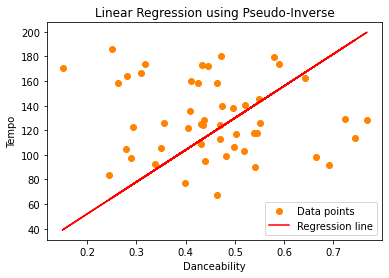

In [14]:
#Pseudo Matrix Inversion Linear Regression
# define matrix A and vector y
A = data_playlist[['Danceability']].values
y = data_playlist[['Tempo']].values

#psuedo-inverse of A
A_pseudo_inverse = np.linalg.pinv(A)

#compute the vector x
x = np.dot(A_pseudo_inverse, y)

# Print the computed x values rounded to 2 decimal places
computed_x = np.round(x, 2)
print("Computed x using pseudo-inverse of A: ", np.round(x, 2))

#Plot the data points, regression line, and set labels and title
plt.scatter(A, y, color='#ff8200', label='Data points')
plt.plot(A, np.dot(A, x), color='red', label='Regression line')
plt.xlabel('Danceability')
plt.ylabel('Tempo')
plt.title('Linear Regression using Pseudo-Inverse')
plt.legend()
plt.show()